In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cd '/content/drive/MyDrive/CV_Project'

/content/drive/.shortcut-targets-by-id/1_RPvYDkRdJuRSW1TOhQQ3eF0O3N5cyeh/CV_Project


In [ ]:
import zipfile

new_file_paths = []
# Set the directory to loop through
dir_path = '/content/drive/MyDrive/CV_Project/Dataset/200EpochTestResults'

extract_path = '/content'

# Loop through the directory
for file_name in os.listdir(dir_path):

    # Check if the file is a zip file
    if file_name.endswith('.zip'):

        # Construct the full file path
        file_path = os.path.join(dir_path, file_name)

        # Extract the contents of the zip file to the destination folder
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Remove the '.zip' extension from the file name
            new_file_name = os.path.splitext(file_name)[0]
            new_file_path = os.path.join(extract_path, new_file_name)
            zip_ref.extractall(new_file_path)
          
        new_file_paths.append(new_file_path)

        # Optional: print a message for each extracted zip file
        print(f'Extracted {file_name} to {new_file_path}')

print(new_file_paths)

Extracted test_gan_sd.zip to /content/test_gan_sd
Extracted test_natural_aug.zip to /content/test_natural_aug
Extracted test_natural_gan_sd.zip to /content/test_natural_gan_sd
Extracted test_natural_gan_sd_aug.zip to /content/test_natural_gan_sd_aug
Extracted test_natural_only.zip to /content/test_natural_only
Extracted test_natural_sd_aug.zip to /content/test_natural_sd_aug
['/content/test_gan_sd', '/content/test_natural_aug', '/content/test_natural_gan_sd', '/content/test_natural_gan_sd_aug', '/content/test_natural_only', '/content/test_natural_sd_aug']


In [ ]:
import os
import numpy as np

def process_image_and_label_files(image_dir_path):
    # Set the directory path where the image and text files are located
    label_dir_path = os.path.join(image_dir_path, 'labels')

    # Get a list of all the image files in the directory
    image_files = [f for f in os.listdir(image_dir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Sort the image files based on their name
    image_files.sort()

    # Get a list of all the label files in the directory
    label_files = [f for f in os.listdir(label_dir_path) if f.endswith('.txt')]

    # Sort the label files based on their name
    label_files.sort()

    # Initialize an n x 10 matrix with zeros
    n = len(image_files)
    print(n)
    matrix = np.zeros((n, 10))


    # Loop through each image file
    for i, image_file in enumerate(image_files):
        # Check if a corresponding label file exists
        label_file_path = os.path.join(label_dir_path, os.path.splitext(image_file)[0] + ".txt")
        if os.path.exists(label_file_path):
            # If the label file exists, read it and update the corresponding column in the matrix
            with open(label_file_path, 'r') as f:
                for line in f:
                    line = line.strip()
                    if line:
                        first_value = int(line.split()[0])
                        matrix[i, first_value] += 1

    return matrix



In [ ]:
matrices = []
#need to modify this everytime we run the script
new_file_paths=['/content/test_gan_sd/content/yolov5/runs/detect/exp6','/content/test_natural_aug/content/yolov5/runs/detect/exp7','/content/test_natural_gan_sd/content/yolov5/runs/detect/exp8',
                '/content/test_natural_gan_sd_aug/content/yolov5/runs/detect/exp9','/content/test_natural_only/content/yolov5/runs/detect/exp10','/content/test_natural_sd_aug/content/yolov5/runs/detect/exp11']
for new_file_path in new_file_paths:
  matrix = process_image_and_label_files(new_file_path)
  matrices.append(matrix)


200
200
200
200
200
200


In [ ]:
#@title Truth
!unzip /content/drive/MyDrive/CV_Project/Dataset/finalTestImages_confScores.zip -d /content/finalImages_withConfindenceScores


Archive:  /content/drive/MyDrive/CV_Project/Dataset/finalTestImages_confScores.zip
   creating: /content/finalImages_withConfindenceScores/finalTestImages/
  inflating: /content/finalImages_withConfindenceScores/__MACOSX/._finalTestImages  
  inflating: /content/finalImages_withConfindenceScores/finalTestImages/000000452921.txt  
  inflating: /content/finalImages_withConfindenceScores/finalTestImages/000000274659.jpg  
  inflating: /content/finalImages_withConfindenceScores/__MACOSX/finalTestImages/._000000274659.jpg  
  inflating: /content/finalImages_withConfindenceScores/finalTestImages/000000105965.jpg  
  inflating: /content/finalImages_withConfindenceScores/__MACOSX/finalTestImages/._000000105965.jpg  
  inflating: /content/finalImages_withConfindenceScores/finalTestImages/000000009839.jpg  
  inflating: /content/finalImages_withConfindenceScores/__MACOSX/finalTestImages/._000000009839.jpg  
  inflating: /content/finalImages_withConfindenceScores/finalTestImages/000000455433.jpg 

In [ ]:
import os
import numpy as np

# Set the directory path where the text files are located
directory = "/content/finalImages_withConfindenceScores/finalTestImages"

# Get a list of all the text files in the directory
txt_files = [f for f in os.listdir(directory) if f.endswith('.txt')]

# Sort the text files based on their name
txt_files.sort()

# Initialize an n x 10 matrix with zeros
n = len(txt_files)
matrix = np.zeros((n, 10))

# Loop through each text file
for i, txt_file in enumerate(txt_files):
    txt_file_path = os.path.join(directory, txt_file)
    with open(txt_file_path, 'r') as f:
        # Loop through each line of the text file
        for line in f:
            # Strip any leading or trailing whitespace from the line
            line = line.strip()
            if line:
                # Split the line on whitespace and get the first value
                first_value = int(line.split()[0])
                # Update the corresponding column in the matrix
                matrix[i, first_value] += 1

TruthMatrix = matrix
print(TruthMatrix)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 2.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
def getfileNames(image_dir_path):
    # Set the directory path where the image and text files are located
    label_dir_path = os.path.join(image_dir_path, 'labels')

    # Get a list of all the image files in the directory
    image_files = [f for f in os.listdir(image_dir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Sort the image files based on their name
    image_files.sort()
    return image_files

In [ ]:
list1 = getfileNames('/content/test_gan_sd/content/yolov5/runs/detect/exp6')
print(list1)

['000000000718.jpg', '000000000851.jpg', '000000002897.jpg', '000000004121.jpg', '000000004638.jpg', '000000006769.jpg', '000000007190.jpg', '000000007764.jpg', '000000008221.jpg', '000000009053.jpg', '000000009839.jpg', '000000009932.jpg', '000000010061.jpg', '000000010864.jpg', '000000011259.jpg', '000000011958.jpg', '000000012889.jpg', '000000013601.jpg', '000000018242.jpg', '000000019233.jpg', '000000019988.jpg', '000000020067.jpg', '000000021027.jpg', '000000033973.jpg', '000000039286.jpg', '000000042838.jpg', '000000044469.jpg', '000000046721.jpg', '000000049831.jpg', '000000052552.jpg', '000000053667.jpg', '000000074804.jpg', '000000076425.jpg', '000000080198.jpg', '000000084076.jpg', '000000093293.jpg', '000000096089.jpg', '000000097035.jpg', '000000105227.jpg', '000000105965.jpg', '000000110167.jpg', '000000113057.jpg', '000000119340.jpg', '000000122275.jpg', '000000129646.jpg', '000000130855.jpg', '000000147570.jpg', '000000153066.jpg', '000000156903.jpg', '000000160697.jpg',

In [ ]:
directory = "/content/finalImages_withConfindenceScores/finalTestImages"

# Get a list of all the text files in the directory
txt_files = [f for f in os.listdir(directory) if f.endswith('.txt')]

txt_files.sort()

list2 = txt_files

In [ ]:

print(list2)

['000000000718.txt', '000000000851.txt', '000000002897.txt', '000000004121.txt', '000000004638.txt', '000000006769.txt', '000000007190.txt', '000000007764.txt', '000000008221.txt', '000000009053.txt', '000000009839.txt', '000000009932.txt', '000000010061.txt', '000000010864.txt', '000000011259.txt', '000000011958.txt', '000000012889.txt', '000000013601.txt', '000000018242.txt', '000000019233.txt', '000000019988.txt', '000000020067.txt', '000000021027.txt', '000000033973.txt', '000000039286.txt', '000000042838.txt', '000000044469.txt', '000000046721.txt', '000000049831.txt', '000000052552.txt', '000000053667.txt', '000000074804.txt', '000000076425.txt', '000000080198.txt', '000000084076.txt', '000000093293.txt', '000000096089.txt', '000000097035.txt', '000000105227.txt', '000000105965.txt', '000000110167.txt', '000000113057.txt', '000000119340.txt', '000000122275.txt', '000000129646.txt', '000000130855.txt', '000000147570.txt', '000000153066.txt', '000000156903.txt', '000000160697.txt',

In [ ]:
# Remove extensions from list1
list1_no_ext = [os.path.splitext(file)[0] for file in list1]

# Remove extensions from list2
list2_no_ext = [os.path.splitext(file)[0] for file in list2]

# Compare modified lists
if set(list1_no_ext) == set(list2_no_ext):
    print("Both lists contain the same items without extensions.")
else:
    print("The lists do not contain the same items without extensions.")


Both lists contain the same items without extensions.


In [ ]:
#@title now compare each matrix with truth matrix

import numpy as np

def compare_matrices(actual_matrix, predicted_matrix):
    """
    Compares two matrices column-wise and returns the counts of true positive, true negative,
    false positive, and false negative.
    
    Args:
    actual_matrix: A numpy matrix of shape (n, 10) containing the actual values.
    predicted_matrix: A numpy matrix of shape (n, 10) containing the predicted values.
    
    Returns:
    A dictionary containing the counts of true positive, true negative, false positive,
    and false negative.
    """
    # Compute the element-wise logical AND and OR of the two matrices
    logical_and = np.logical_and(actual_matrix, predicted_matrix)
    logical_or = np.logical_or(actual_matrix, predicted_matrix)
    
    # Compute the counts of true positive, true negative, false positive, and false negative
    true_positive = np.sum(logical_and, axis=0)
    true_negative = np.sum(np.logical_not(logical_or), axis=0)
    false_positive = np.sum(np.logical_and(np.logical_not(actual_matrix), predicted_matrix), axis=0)
    false_negative = np.sum(np.logical_and(actual_matrix, np.logical_not(predicted_matrix)), axis=0)
    
    # Return the counts as a dictionary
    return {'true_positive': true_positive,
            'true_negative': true_negative,
            'false_positive': false_positive,
            'false_negative': false_negative}




In [ ]:
def calc_precision_recall(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall

In [ ]:
precision_values = []
recall_values = []

# precision_individual_column 
x1 = [0]*10
x2 = [0]*10
x3 = [0]*10
x4 = [0]*10



for predicted_matrix in matrices:
  output = compare_matrices(TruthMatrix, predicted_matrix)
    # Get the true positive and true negative lists
  tp_list = output['true_positive']
  tn_list = output['true_negative']
  fp_list = output['false_positive']
  fn_list = output['false_negative']

  x1 = x1+tp_list
  x2 = x2+tn_list
  x3 = x3+fp_list
  x4 = x4+fn_list

  tp = sum(tp_list)
  tn = sum(tn_list)
  fp = sum(fp_list)
  fn = sum(fn_list)

  precision, recall = calc_precision_recall(tp, tn, fp, fn)


  precision_values.append(precision)
  recall_values.append(recall)

  print(precision)
  print(recall)

  print("--------")

  # precision_list=[]
  # recall_list = []
  # for i in range(len(tp_list)):
  #   precision, recall = calc_precision_recall(tp_list[i],tn_list[i],fp_list[i],fn_list[i])
  #   precision_list.append(precision)
  #   recall_list.append(recall)
  # precision_values.append(precision_list)
  # recall_values.append(recall_list)

0.8440366972477065
0.5054945054945055
--------
0.8150943396226416
0.5934065934065934
--------
0.7992565055762082
0.5906593406593407
--------
0.7875457875457875
0.5906593406593407
--------
0.8106312292358804
0.6703296703296703
--------
0.8333333333333334
0.5769230769230769
--------


In [ ]:
precision_values_col = []
recall_values_col = []

for i in range(10):
  precision_col_temp, recall_col_temp = calc_precision_recall(x1[i], x2[i], x3[i], x4[i])
  print(recall_col_temp)
  precision_values_col.append(precision_col_temp)
  recall_values_col.append(recall_col_temp)


print(precision_values_col)
print(recall_values_col)

0.7318840579710145
0.5862068965517241
0.4583333333333333
0.8333333333333334
0.5972222222222222
0.26881720430107525
0.6666666666666666
0.7547619047619047
0.5925925925925926
0.29924242424242425
[0.926605504587156, 0.8793103448275862, 0.8354430379746836, 0.776255707762557, 0.8333333333333334, 0.8771929824561403, 0.822429906542056, 0.7712895377128953, 0.8135593220338984, 0.7596153846153846]
[0.7318840579710145, 0.5862068965517241, 0.4583333333333333, 0.8333333333333334, 0.5972222222222222, 0.26881720430107525, 0.6666666666666666, 0.7547619047619047, 0.5925925925925926, 0.29924242424242425]


In [ ]:
precision_values 

[0.8440366972477065,
 0.8150943396226416,
 0.7992565055762082,
 0.7875457875457875,
 0.8106312292358804,
 0.8333333333333334]

In [ ]:
recall_values

[0.5054945054945055,
 0.5934065934065934,
 0.5906593406593407,
 0.5906593406593407,
 0.6703296703296703,
 0.5769230769230769]

[0.8440366972477065, 0.8150943396226416, 0.7992565055762082, 0.7875457875457875, 0.8106312292358804, 0.8333333333333334]


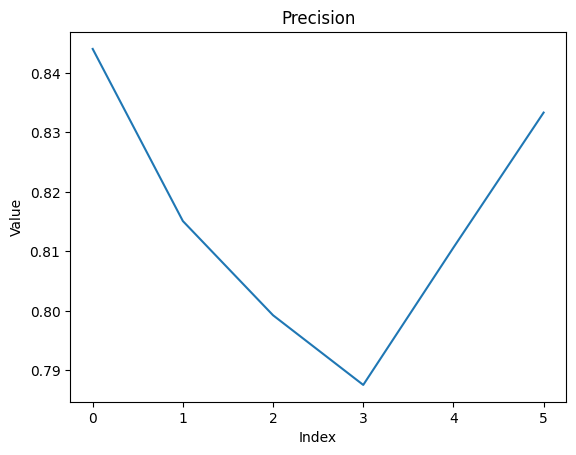

In [ ]:
import matplotlib.pyplot as plt

print(precision_values)
plt.plot(precision_values)
plt.title("Precision")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()



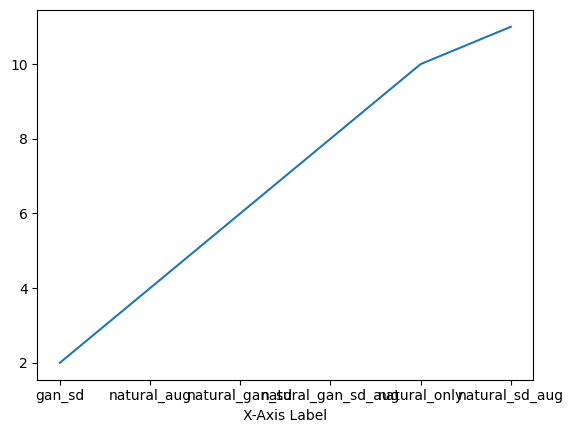

In [ ]:
import matplotlib.pyplot as plt

y = [2, 4, 6, 8, 10,11]

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(['gan_sd', 'natural_aug', 'natural_gan_sd', 'natural_gan_sd_aug', 'natural_only','natural_sd_aug'])
# Set the x-axis label
ax.set_xlabel('X-Axis Label')

# Display the plot
plt.show()


In [ ]:
print(len(precision_values))

6


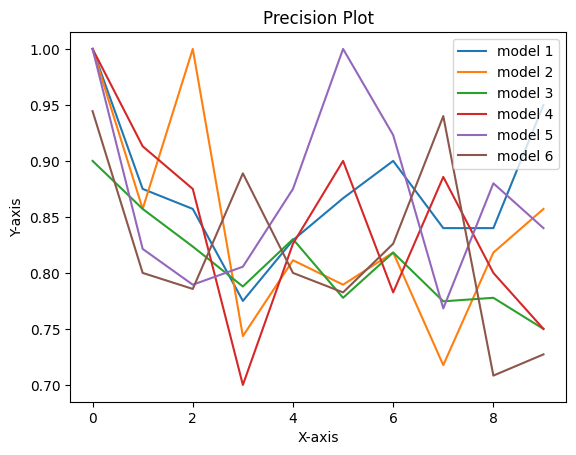

In [ ]:
import matplotlib.pyplot as plt

# plot each row of the 2D list
for i in range(len(precision_values)):
    plt.plot(precision_values[i], label=f"model {i+1}")

# set the title, x-label and y-label
plt.title("Precision Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# show the legend
plt.legend()

# show the plot
plt.show()


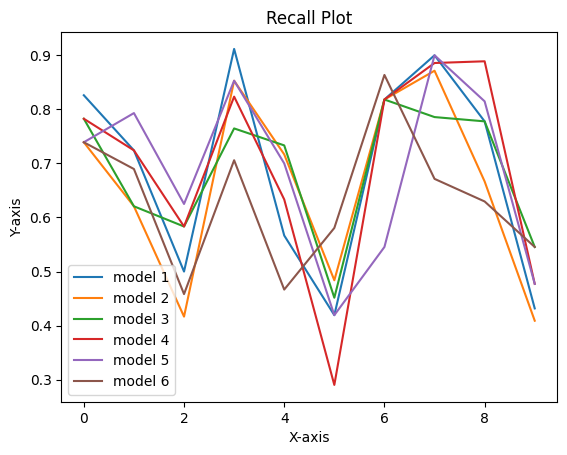

In [ ]:
import matplotlib.pyplot as plt

# plot each row of the 2D list
for i in range(len(recall_values)):
    plt.plot(recall_values[i], label=f"model {i+1}")

# set the title, x-label and y-label
plt.title("Recall Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# show the legend
plt.legend()

# show the plot
plt.show()


In [ ]:
print(outputs)

[{'true_positive': array([19, 21, 12, 31, 34, 13, 18, 63, 21, 19]), 'true_negative': array([177, 168, 174, 157, 133, 167, 176, 118, 169, 155]), 'false_positive': array([ 0,  3,  2,  9,  7,  2,  2, 12,  4,  1]), 'false_negative': array([ 4,  8, 12,  3, 26, 18,  4,  7,  6, 25])}, {'true_positive': array([17, 18, 10, 29, 43, 15, 18, 61, 18, 18]), 'true_negative': array([177, 168, 176, 156, 130, 165, 174, 106, 169, 153]), 'false_positive': array([ 0,  3,  0, 10, 10,  4,  4, 24,  4,  3]), 'false_negative': array([ 6, 11, 14,  5, 17, 16,  4,  9,  9, 26])}, {'true_positive': array([18, 18, 14, 26, 44, 14, 18, 55, 21, 24]), 'true_negative': array([175, 168, 173, 159, 131, 165, 174, 114, 167, 148]), 'false_positive': array([ 2,  3,  3,  7,  9,  4,  4, 16,  6,  8]), 'false_negative': array([ 5, 11, 10,  8, 16, 17,  4, 15,  6, 20])}, {'true_positive': array([18, 21, 14, 28, 38,  9, 18, 62, 24, 21]), 'true_negative': array([177, 169, 174, 154, 132, 168, 173, 122, 167, 149]), 'false_positive': arra

In [ ]:
len(outputs)

6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def plot_precision_recall(tp_list, tn_list, fp_list, fn_list):
    n_cols = len(tp_list[0])
    precisions = np.zeros(n_cols)
    recalls = np.zeros(n_cols)

    for i in range(n_cols):
        tp = sum(tp_list[:, i])
        tn = sum(tn_list[:, i])
        fp = sum(fp_list[:, i])
        fn = sum(fn_list[:, i])

        precision, recall = calc_precision_recall(tp, tn, fp, fn)
        precisions[i] = precision
        recalls[i] = recall

    plt.plot(recalls, precisions)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
